## The objective of this assessment is to evaluate clustering techniques to a real-world dataset.# Dataset 
Usdein this is  Iris dataset available in the sklearn library.



# importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading and Preprocessing 

In [31]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [35]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [37]:
#check missing values

print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [43]:
list(df)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

## KMeans Clustering :- K-Means Clustering is an Unsupervised Machine Learning algorithm which groups the unlabeled dataset into different clusters. The article aims to explore the fundamentals and working of k means clustering along with its implementation.

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
df['Cluster'] = kmeans.fit_predict(scaled_features)
labels = kmeans.labels_
labels

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [65]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


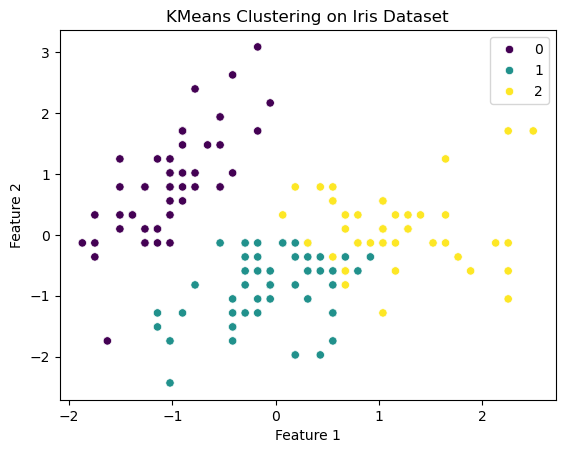

In [73]:
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=labels, palette='viridis')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply elbow method to determine optimal no of clusters

In [75]:
wcss = []
k_values = range(1,11) #check from 1 to 10 clusters
for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

In [77]:
k_values

range(1, 11)

In [79]:
wcss

[600.0000000000001,
 222.36170496502302,
 140.0820210962167,
 114.55684421262922,
 105.47084744732012,
 80.03687480296514,
 73.47863919033293,
 64.5845223115777,
 57.72871084235592,
 49.34199104439358]

# Evaluate KMean Cluster

In [81]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_features,labels)
print(silhouette_avg)

0.45994823920518635


## Hierarchical Clustering :- 
Hierarchical clustering is a method of cluster analysis in data mining that creates a hierarchical representation of the clusters in a dataset. The method starts by treating each data point as a separate cluster and then iteratively combines the closest clusters until a stopping criterion is reached. The result of hierarchical clustering is a tree-like structure, called a dendrogram, which illustrates the hierarchical relationships among the clusters.

# AgglomerativeClustering :- Agglomerative clustering is defined as a hierarchical clustering method where items are grouped into clusters based on similarities, starting with each item as a singleton cluster and then merging pairs of clusters until all items are in one large cluster.

In [103]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3,metric = 'euclidean',linkage='ward')
df['Cluster'] = hc.fit_predict(scaled_features)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


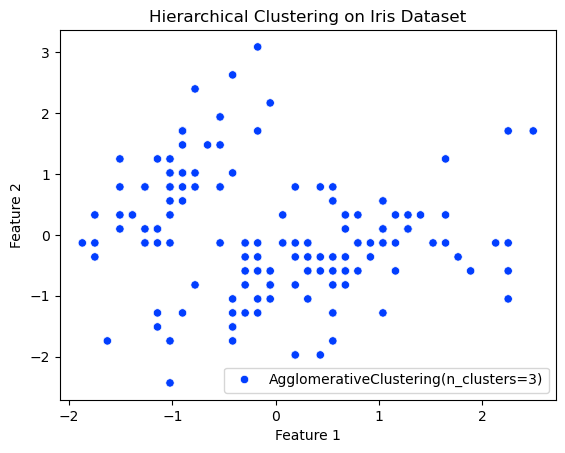

In [105]:
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=hc, palette='bright')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Dendrogram :- A dendrogram is a tree-like diagram that shows the relationships between similar objects. It's often used to visualize the results of hierarchical clustering. 

In [107]:
from scipy.cluster.hierarchy import dendrogram,linkage

z = linkage(scaled_features,method ='ward') #perform hierarcial clustering

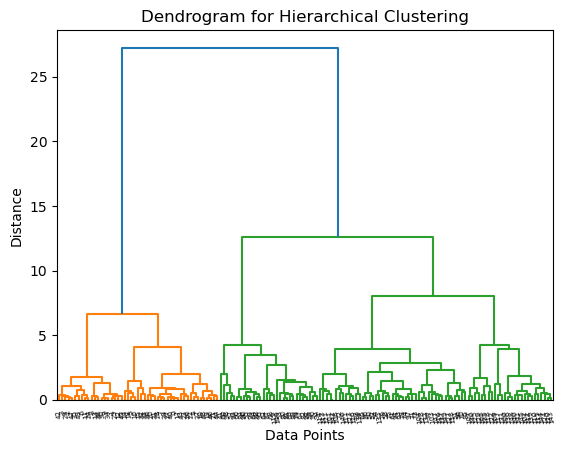

In [125]:
# Plot the dendrogram

dendrogram(z, leaf_rotation = 100)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

Hierarchical clustering builds a hierarchy of clusters by either merging (agglomerative) or splitting (divisive) clusters.
It's suitable for the Iris dataset because it provides insight into the hierarchical relationships between species.
'''